Überblick
        Datum  Warengruppe      Umsatz
0  2013-07-01            1  148.828353
1  2013-07-02            1  159.793757
2  2013-07-03            1  111.885594
3  2013-07-04            1  168.864941
4  2013-07-05            1  171.280754
(9334, 3)
        Datum  KielerWoche
0  2012-06-16            1
1  2012-06-17            1
2  2012-06-18            1
3  2012-06-19            1
4  2012-06-20            1
(72, 2)
        Datum  Bewoelkung  Temperatur  Windgeschwindigkeit  Wettercode
0  2012-01-01         8.0      9.8250                   14        58.0
1  2012-01-02         7.0      7.4375                   12         NaN
2  2012-01-03         8.0      5.5375                   18        63.0
3  2012-01-04         4.0      5.6875                   19        80.0
4  2012-01-05         6.0      5.3000                   23        80.0
(2601, 5)
Wetter_Umsatzdaten
        Datum  Bewoelkung  Temperatur  Windgeschwindigkeit  Wettercode  \
0  2013-07-01         6.0     17.8375          

/tmp/ipykernel_1830/3986735137.py:71: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='Wochentag',


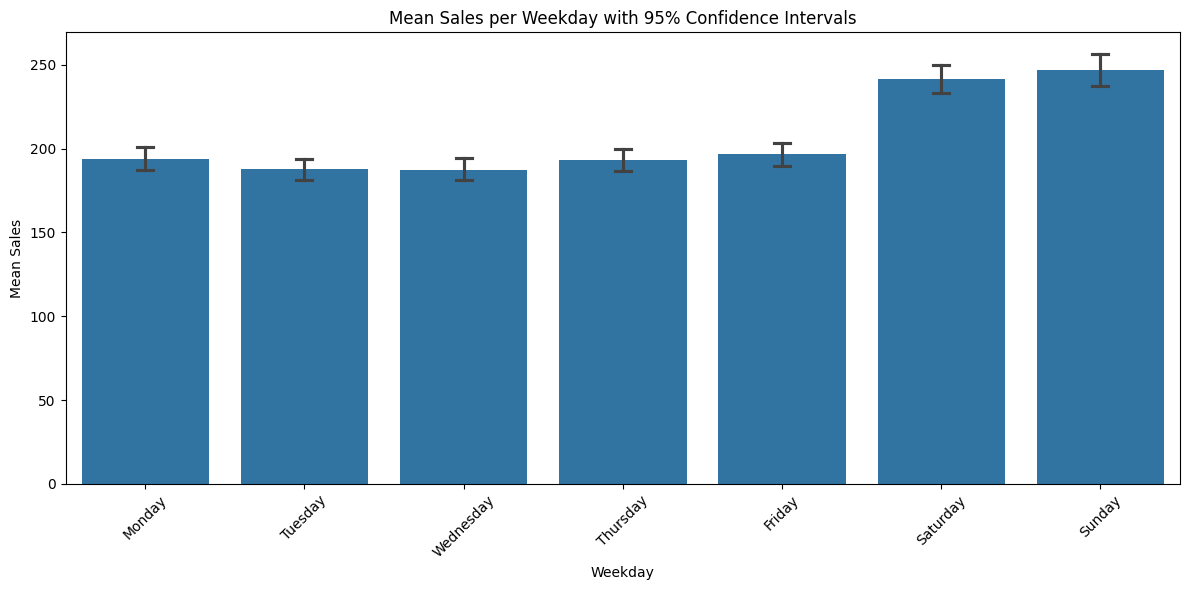

Ensuring all required columns are present in the DataFrame...
Splitting dataset into training and validation sets...
Preparing feature matrices and target vectors...
Normalizing features...
Iteration    0: Cost 4.86e+04, w: [ 0.33332854 -0.17546054  0.15176915 -0.6502174   1.43884715 -0.19862681
 -0.84905625  0.24092191], b: 2.601279930776937
Iteration  100: Cost 7.52e+03, w: [ 18.89233305  -8.43058153   5.3283455  -37.28929394  82.75108052
 -11.34030977 -49.08643988  13.91673326], b: 165.86488732412838
Iteration  200: Cost 2.67e+03, w: [ 24.88995074  -9.74017631   4.05885444 -47.6168223  105.83073849
 -14.44624662 -62.95181228  17.839821  ], b: 225.62464778303007
Iteration  300: Cost 2.06e+03, w: [ 27.41005308  -9.82185665   2.54218004 -50.52879594 112.38063601
 -15.3128589  -66.93233568  18.96402963], b: 247.4986528177293
Iteration  400: Cost 1.99e+03, w: [ 28.66711085  -9.73005158   1.53628501 -51.35033975 114.23896488
 -15.55509783 -68.0728559   19.28564815], b: 255.50524609360266


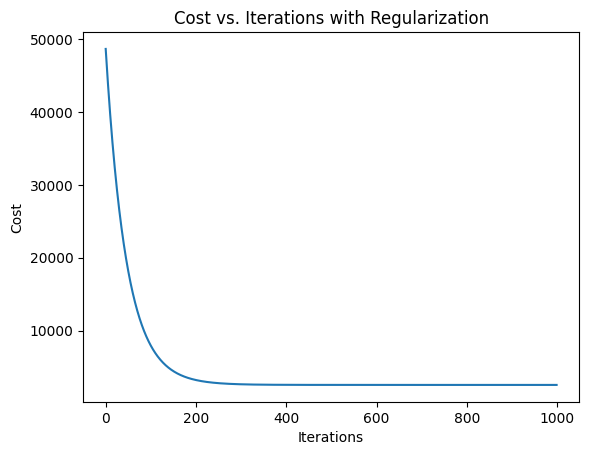

R^2 (coefficient of determination) on validation set: 0.8277


In [ ]:
#merge data from multiple files into one file
import pandas as pd

# Define the URLs for the additional datasets
kiwo_url = 'https://raw.githubusercontent.com/opencampus-sh/einfuehrung-in-data-science-und-ml/main/kiwo.csv'
wetter_url = 'https://raw.githubusercontent.com/opencampus-sh/einfuehrung-in-data-science-und-ml/main/wetter.csv'
umsatzdaten_gekuerzt_url = 'https://raw.githubusercontent.com/opencampus-sh/einfuehrung-in-data-science-und-ml/main/umsatzdaten_gekuerzt.csv'

# Load the additional datasets
kiwo = pd.read_csv(kiwo_url, delimiter=',')
wetter = pd.read_csv(wetter_url, delimiter=',')
umsatzdaten_gekuerzt = pd.read_csv(umsatzdaten_gekuerzt_url, delimiter=',')

# Save the datasets locally
kiwo.to_csv('kiwo.csv', index=False)
wetter.to_csv('wetter.csv', index=False)
umsatzdaten_gekuerzt.to_csv('umsatzdaten_gekuerzt.csv', index=False)

#inspect data
print('Überblick')
print(umsatzdaten_gekuerzt.head())
print(umsatzdaten_gekuerzt.shape)
print(kiwo.head())
print(kiwo.shape)
print(wetter.head())
print(wetter.shape)

#merge wetter and umsatzdaten data
print('Wetter_Umsatzdaten')
wetter_umsatzdaten = pd.merge(wetter, umsatzdaten_gekuerzt, on="Datum")
print(wetter_umsatzdaten.head())
print(wetter_umsatzdaten.shape)

#merge with kiwo data
print('Wetter_Umsatzdaten_Kiwo')
wetter_umsatzdaten_kiwo = pd.merge(wetter_umsatzdaten, kiwo, on="Datum")
print(wetter_umsatzdaten_kiwo.head())
print(wetter_umsatzdaten_kiwo.shape)

#remove kiwo dates from data
print('Wetter_Umsatzdaten_except_Kiwo')
wetter_umsatzdaten_except_kiwo = wetter_umsatzdaten[~wetter_umsatzdaten["Datum"].isin(kiwo["Datum"])]
print(wetter_umsatzdaten_except_kiwo.head())
print(wetter_umsatzdaten_except_kiwo.shape)

#save data
wetter_umsatzdaten.to_csv("wetter_umsatzdaten.csv", index=False)
wetter_umsatzdaten_kiwo.to_csv("wetter_umsatzdaten_kiwo.csv", index=False)  
wetter_umsatzdaten_except_kiwo.to_csv("wetter_umsatzdaten_except_kiwo.csv", index=False)    

#inspect Umsatzdaten_gekuerzt data for missing dates
print("Missing values per column:")
print(wetter_umsatzdaten.isnull().sum())

#visualize data
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Convert the "Datum" column to datetime
wetter_umsatzdaten['Datum'] = pd.to_datetime(wetter_umsatzdaten['Datum'], format='%Y-%m-%d')
wetter_umsatzdaten['Wochentag'] = wetter_umsatzdaten['Datum'].dt.day_name()

# Order weekdays
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create bar chart with confidence intervals
plt.figure(figsize=(12, 6))
sns.barplot(x='Wochentag', 
            y='Umsatz', 
            data=wetter_umsatzdaten, 
            order=weekday_order,
            ci=95,  # Add 95% confidence intervals
            capsize=0.1)  # Add caps to error bars

plt.title('Mean Sales per Weekday with 95% Confidence Intervals')
plt.ylabel('Mean Sales')
plt.xlabel('Weekday')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define date ranges for splitting the data
training_start_date = '2013-07-01'
training_end_date = '2017-07-31'
validation_start_date = '2017-08-01'
validation_end_date = '2018-07-31'

# Dynamically ensure required columns exist
print("Ensuring all required columns are present in the DataFrame...")

# Check and create 'Is_Weekend' column
if 'Datum' not in wetter_umsatzdaten_kiwo.columns:
    raise KeyError("'Datum' column is missing from the DataFrame.")
wetter_umsatzdaten_kiwo['Datum'] = pd.to_datetime(wetter_umsatzdaten_kiwo['Datum'], errors='coerce')
if 'Is_Weekend' not in wetter_umsatzdaten_kiwo.columns:
    wetter_umsatzdaten_kiwo['Is_Weekend'] = wetter_umsatzdaten_kiwo['Datum'].dt.weekday.isin([5, 6]).astype(int)

# Check and create 'Temperature_Category' column
if 'Temperatur' not in wetter_umsatzdaten_kiwo.columns:
    raise KeyError("'Temperatur' column is missing from the DataFrame.")
if 'Temperature_Category' not in wetter_umsatzdaten_kiwo.columns:
    def classify_temperature(temp):
        if temp < 0:
            return -2  # Very Cold
        elif 0 <= temp <= 10:
            return -1  # Cold
        elif 10 < temp <= 20:
            return 1   # Warm
        else:
            return 2   # Very Warm
    wetter_umsatzdaten_kiwo['Temperature_Category'] = wetter_umsatzdaten_kiwo['Temperatur'].apply(classify_temperature)

# Perform one-hot encoding for 'Warengruppe' if not already encoded
if not any(col.startswith('Warengruppe_') for col in wetter_umsatzdaten_kiwo.columns):
    warengruppe_encoded = pd.get_dummies(wetter_umsatzdaten_kiwo['Warengruppe'], prefix='Warengruppe')
    wetter_umsatzdaten_kiwo = pd.concat([wetter_umsatzdaten_kiwo, warengruppe_encoded], axis=1)

# Dynamically construct feature_columns
warengruppe_columns = [col for col in wetter_umsatzdaten_kiwo.columns if col.startswith('Warengruppe_')]
feature_columns = ['Is_Weekend', 'Temperature_Category', 'Windgeschwindigkeit'] + warengruppe_columns

# Validate all feature columns exist
missing_columns = [col for col in feature_columns if col not in wetter_umsatzdaten_kiwo.columns]
if missing_columns:
    raise KeyError(f"Error: The following required columns are missing from the DataFrame: {missing_columns}")

# Split dataset into training and validation sets based on date ranges
print("Splitting dataset into training and validation sets...")
training_data = wetter_umsatzdaten_kiwo[(wetter_umsatzdaten_kiwo['Datum'] >= training_start_date) &
                                        (wetter_umsatzdaten_kiwo['Datum'] <= training_end_date)]
validation_data = wetter_umsatzdaten_kiwo[(wetter_umsatzdaten_kiwo['Datum'] >= validation_start_date) &
                                          (wetter_umsatzdaten_kiwo['Datum'] <= validation_end_date)]

# Prepare features (X) and target (y) for training and validation
print("Preparing feature matrices and target vectors...")
X_train = training_data[feature_columns].apply(pd.to_numeric, errors='coerce').fillna(0).to_numpy(dtype=np.float64)
y_train = training_data['Umsatz'].to_numpy()

X_val = validation_data[feature_columns].apply(pd.to_numeric, errors='coerce').fillna(0).to_numpy(dtype=np.float64)
y_val = validation_data['Umsatz'].to_numpy()

# Normalize features
print("Normalizing features...")
X_mean = np.mean(X_train, axis=0)
X_std = np.std(X_train, axis=0)
if np.any(X_std == 0):  # Handle zero standard deviation
    print("Warning: Zero standard deviation detected. Setting std to 1 for these columns.")
    X_std[X_std == 0] = 1  # Avoid division by zero

X_train = (X_train - X_mean) / X_std
X_val = (X_val - X_mean) / X_std  # Normalize validation data using training data statistics

# Regularized cost function (L2 Regularization)
def compute_cost_reg(X, y, w, b, lambda_):
    m = X.shape[0]
    cost = (1 / (2 * m)) * np.sum((np.dot(X, w) + b - y) ** 2)  # Standard cost
    reg_cost = (lambda_ / (2 * m)) * np.sum(w ** 2)  # Regularization term
    return cost + reg_cost

# Regularized gradient computation (L2 Regularization)
def compute_gradient_reg(X, y, w, b, lambda_):
    m = X.shape[0]
    dj_dw = (1 / m) * np.dot((np.dot(X, w) + b - y), X) + (lambda_ / m) * w  # Gradient of weights
    dj_db = (1 / m) * np.sum(np.dot(X, w) + b - y)  # Gradient of bias
    return dj_dw, dj_db

# Regularized gradient descent
def gradient_descent_reg(X, y, w_in, b_in, alpha, num_iters, lambda_, cost_function, gradient_function):
    w = w_in
    b = b_in
    J_history = []
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(X, y, w, b, lambda_)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        J_history.append(cost_function(X, y, w, b, lambda_))
        if i % (num_iters // 10) == 0 or i == num_iters - 1:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e}, w: {w}, b: {b}")
    return w, b, J_history

# Hyperparameters
alpha = 0.01         # Learning rate
iterations = 1000    # Number of iterations

# Define possible lambda values
lambda_values = [0.01, 0.1, 1, 10]

best_lambda = None
best_r_squared = -np.inf

for lambda_ in lambda_values:
    w_init = np.zeros(X_train.shape[1])
    b_init = 0
    w_final, b_final, J_hist = gradient_descent_reg(X_train, y_train, w_init, b_init, alpha, iterations, lambda_,
                                                    compute_cost_reg, compute_gradient_reg)

    # Validate the model and compute R^2
    y_val_pred = np.dot(X_val, w_final) + b_final
    ss_total = np.sum((y_val - np.mean(y_val)) ** 2)
    ss_residual = np.sum((y_val - y_val_pred) ** 2)
    r_squared = 1 - (ss_residual / ss_total)

    print(f"Lambda: {lambda_}, R^2: {r_squared:.4f}")

    if r_squared > best_r_squared:
        best_r_squared = r_squared
        best_lambda = lambda_

print(f"Best Lambda: {best_lambda}, Best R^2: {best_r_squared:.4f}")


# Run regularized gradient descent
w_init = np.zeros(X_train.shape[1])
b_init = 0
w_final, b_final, J_hist = gradient_descent_reg(X_train, y_train, w_init, b_init, alpha, iterations, lambda_,
                                                compute_cost_reg, compute_gradient_reg)

print(f"\nFinal parameters with Regularization:\nw = {w_final}\nb = {b_final}\n")

# Validate the model on validation set
validation_cost = compute_cost_reg(X_val, y_val, w_final, b_final, lambda_)
print(f"Validation cost: {validation_cost:.4e}")

# Predictions on validation set
y_val_pred = np.dot(X_val, w_final) + b_final

# Calculate Mean Squared Error (MSE)
mse = np.mean((y_val - y_val_pred) ** 2)
print(f"Mean Squared Error (MSE) on validation set: {mse:.4e}")

# Predictions (example input with Warengruppe columns)
sample_inputs = np.array([[1, -2, 10] + [1, 0, 0, 0, 0],  # Weekend, Very Cold, Warengruppe 1
                          [0, -1, 20] + [0, 1, 0, 0, 0],  # Weekday, Cold, Warengruppe 2
                          [1, 2, 5] + [0, 0, 1, 0, 0]])   # Weekend, Very Warm, Warengruppe 3
sample_inputs = (sample_inputs - X_mean) / X_std
predictions = np.dot(sample_inputs, w_final) + b_final
print(f"Predicted Umsatz with Regularization for sample inputs:\n{predictions}")

# Plot Cost vs Iterations
plt.plot(J_hist)
plt.title("Cost vs. Iterations with Regularization")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()

# Calculate R-squared (R^2)
y_val_mean = np.mean(y_val)
ss_total = np.sum((y_val - y_val_mean) ** 2)  # Total sum of squares
ss_residual = np.sum((y_val - y_val_pred) ** 2)  # Residual sum of squares
r_squared = 1 - (ss_residual / ss_total)

print(f"R^2 (coefficient of determination) on validation set: {r_squared:.4f}")